In [9]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle

In [10]:
# Read in an image and grayscale it
image = mpimg.imread('original.png')

In [11]:
# Define a function that applies Sobel x or y, 
# then takes an absolute value and applies a threshold.
# Note: calling your function with orient='x', thresh_min=5, thresh_max=100
# should produce output like the example image shown above this quiz.
# def abs_sobel_thresh(img, orient='x', thresh_min=0, thresh_max=255):
def abs_sobel_thresh(img, orient='x', thresh=(0, 255)):
    # Apply the following steps to img
    
    # 1) Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    # 2) Take the derivative in x or y given orient = 'x' or 'y'
    sobel_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0)
    sobel_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1)
    print("sobel_x:")
    print(sobel_x)
    # 3) Take the absolute value of the derivative or gradient
    if 'x' == orient:
        abs_sobel = np.absolute(cv2.Sobel(gray, cv2.CV_64F, 1, 0))
    elif 'y' == orient:
        abs_sobel = np.absolute(cv2.Sobel(gray, cv2.CV_64F, 0, 1))
    print("abs_sobel:")
    print(abs_sobel)
        
    # 4) Scale to 8-bit (0 - 255) then convert to type = np.uint8
    scaled_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))
    print("scaled_sobel:")
    print(scaled_sobel)
    
    # 5) Create a mask of 1's where the scaled gradient magnitude 
            # is > thresh_min and < thresh_max
    mask = (scaled_sobel >= thresh[0]) & (scaled_sobel <= thresh[1])
    print("mask:")
    print(mask)
    
    # 6) Return this mask as your binary_output image
    binary_output = np.zeros_like(scaled_sobel)
    binary_output[mask] = 1
    
    return binary_output

sobel_x:
[[ 0.          0.33164709  0.17629021 ..., -0.29042355 -0.1213647   0.        ]
 [ 0.          0.48295689  0.25081573 ..., -0.42269808 -0.2761647   0.        ]
 [ 0.          0.73911764  0.37823538 ..., -0.65517655 -0.53493726  0.        ]
 ..., 
 [ 0.          0.63149022  0.33847451 ..., -0.51756082 -0.36364316  0.        ]
 [ 0.          0.46181571  0.24314121 ..., -0.34963138 -0.19106666  0.        ]
 [ 0.          0.35286278  0.18427454 ..., -0.25653332 -0.09562352  0.        ]]
abs_sobel:
[[ 0.          0.33164709  0.17629021 ...,  0.29042355  0.1213647   0.        ]
 [ 0.          0.48295689  0.25081573 ...,  0.42269808  0.2761647   0.        ]
 [ 0.          0.73911764  0.37823538 ...,  0.65517655  0.53493726  0.        ]
 ..., 
 [ 0.          0.63149022  0.33847451 ...,  0.51756082  0.36364316  0.        ]
 [ 0.          0.46181571  0.24314121 ...,  0.34963138  0.19106666  0.        ]
 [ 0.          0.35286278  0.18427454 ...,  0.25653332  0.09562352  0.        ]]
scal

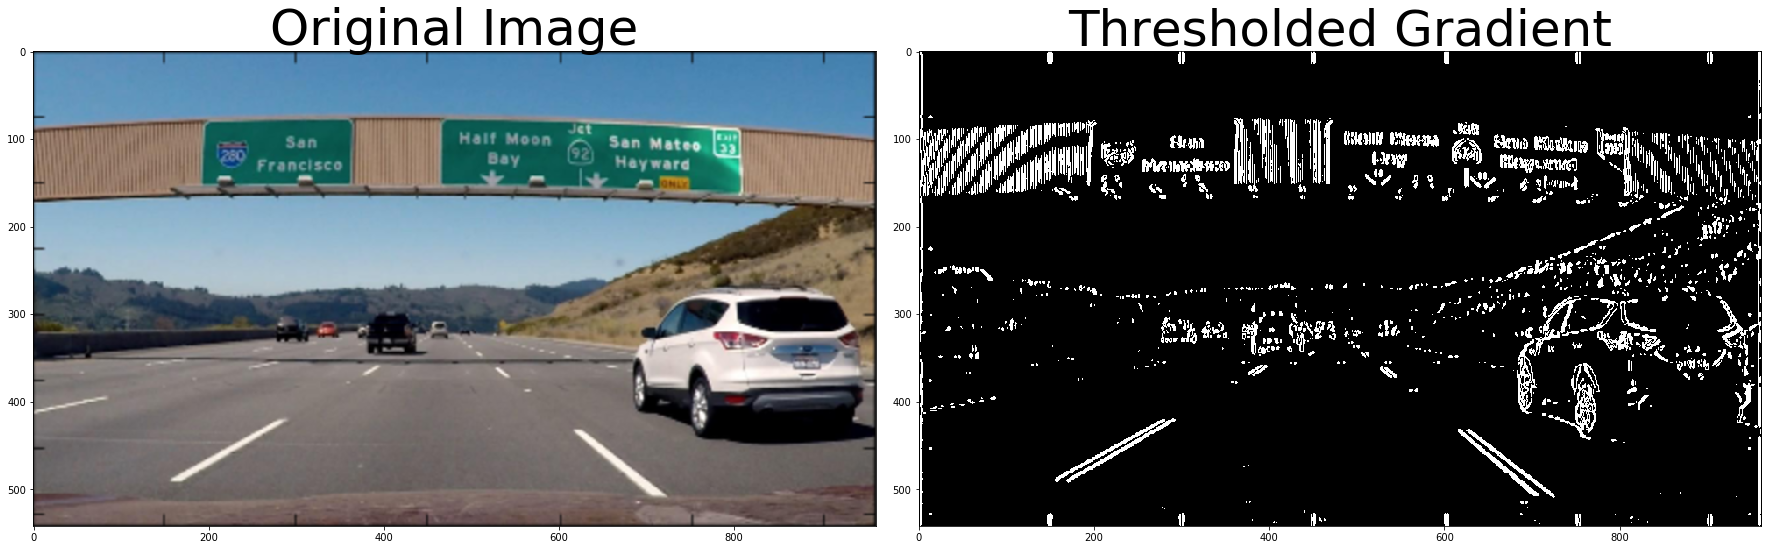

In [13]:
# Run the function
grad_binary = abs_sobel_thresh(image, orient='x', thresh=(20,100))
# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(grad_binary, cmap='gray')
ax2.set_title('Thresholded Gradient', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)